## <center>  **Zomato Bengaluru Restaurants Analysis**</center>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('G:\Data sets\zomato.csv')

In [3]:
df.head(4)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Data Cleaning

In [6]:
df.drop(['url','address','phone','menu_item','dish_liked','reviews_list','listed_in(city)'], axis=1, inplace=True)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(35011, 10)

In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
# create fuction to Removing "NEW","_" and "/s"
def handlerate(value):
    if(value=="NEW" or value == "-"):
        return np.nan
    else:
        value= str(value).split('/')
        value= value[0]
        return float(value)

df['rate']=df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [10]:
df['rate'].fillna(df['rate'].mean(), inplace=True) #filling null values in rate column with mean
df['rate'].isnull().sum()

0

In [11]:
df.dropna(inplace=True)

In [12]:
df.rename(columns={'approx_cost(for two people)':'Cost2plates','listed_in(type)':'Type'}, inplace=True) 

In [13]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
# Removing "," from Cost2plates Column
def removecomma(value):
    value=str(value) # this line is to ensure  that the subsequent operations, such as checking for the presence of a comma and removing it using replace are applicable to string data.
    if',' in value:
        value= value.replace(',','')
        return float(value)
    else:
        return float(value)

df['Cost2plates']= df['Cost2plates'].apply(removecomma)
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [15]:
rest_types=df['rest_type'].value_counts(ascending = False)
rest_types

rest_type
Quick Bites                   12123
Casual Dining                  7533
Cafe                           2578
Delivery                       1502
Dessert Parlor                 1491
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [16]:
# Making Rest Types less than 1000 in frequency as others
less_rest_types=rest_types[rest_types<1000]
less_rest_types

rest_type
Casual Dining, Bar            949
Bakery                        736
Beverage Shop                 487
Bar                           473
Food Court                    424
                             ... 
Pop Up                          1
Quick Bites, Kiosk              1
Mess, Quick Bites               1
Dessert Parlor, Food Court      1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 87, dtype: int64

In [17]:
def less_rest_type(value):
    if(value in less_rest_types):
        return 'Others'
    else:
        return value

df['rest_type'] = df['rest_type'].apply(less_rest_type)

In [18]:
df['rest_type'].value_counts()

rest_type
Quick Bites           12123
Others                 8193
Casual Dining          7533
Cafe                   2578
Delivery               1502
Dessert Parlor         1491
Takeaway, Delivery     1216
Name: count, dtype: int64

In [19]:
lc=df['location'].value_counts(ascending=False)
lc

location
BTM                     2484
Whitefield              1945
HSR                     1753
Indiranagar             1747
Marathahalli            1649
                        ... 
Yelahanka                  5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: count, Length: 93, dtype: int64

In [20]:
other_location=lc[lc<300]

In [21]:
def otherloc (value):
    if(value in other_location):
        return  'Others'
    else:
        return value

In [22]:
df['location']=df['location'].apply(otherloc)

In [23]:
df['location'].value_counts(ascending=False)

location
Others                   4838
BTM                      2484
Whitefield               1945
HSR                      1753
Indiranagar              1747
Marathahalli             1649
Koramangala 5th Block    1605
JP Nagar                 1400
Jayanagar                1242
Electronic City          1212
Bellandur                1120
Bannerghatta Road        1052
Sarjapur Road             933
Brigade Road              687
Koramangala 7th Block     624
Brookefield               598
Koramangala 6th Block     590
Koramangala 4th Block     587
Kalyan Nagar              584
New BEL Road              582
Banashankari              571
Malleshwaram              556
MG Road                   554
Ulsoor                    546
Koramangala 1st Block     539
Frazer Town               469
Basavanagudi              463
Rajajinagar               462
Church Street             446
Banaswadi                 427
Residency Road            423
Kammanahalli              417
Old Airport Road          401
L

In [24]:
cuisines=df['cuisines'].value_counts(ascending=True)

less_cuisines=cuisines[cuisines<100]

def cuisine(value):
    if (value in less_cuisines):
        return 'Others'
    else:
        return value

df['cuisines'] = df['cuisines'].apply(cuisine)
df['cuisines'].value_counts()

cuisines
Others                                              19621
North Indian                                         1895
North Indian, Chinese                                1561
South Indian                                         1172
Bakery, Desserts                                      591
Biryani                                               557
Fast Food                                             485
South Indian, North Indian, Chinese                   475
Desserts                                              447
Cafe                                                  447
Bakery                                                385
Chinese                                               337
Ice Cream, Desserts                                   304
Mithai, Street Food                                   256
Chinese, North Indian                                 249
North Indian, Chinese, Biryani                        234
Desserts, Ice Cream                                   226
North

---

# Visualization

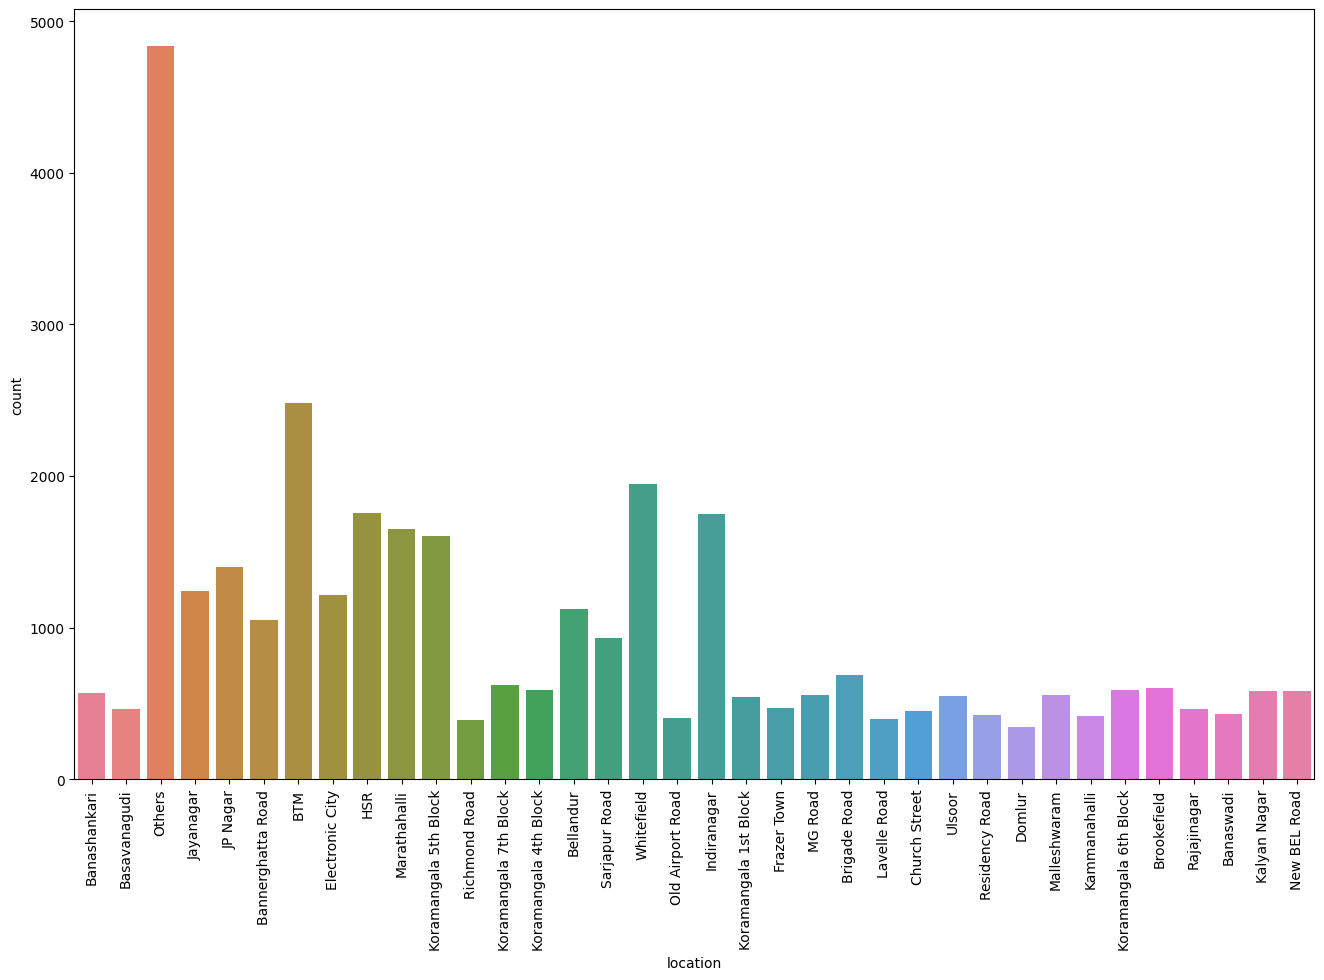

In [25]:
plt.figure(figsize=(16,10))
sns.countplot(data=df, x='location',hue='location')
plt.xticks(rotation=90)
plt.show()

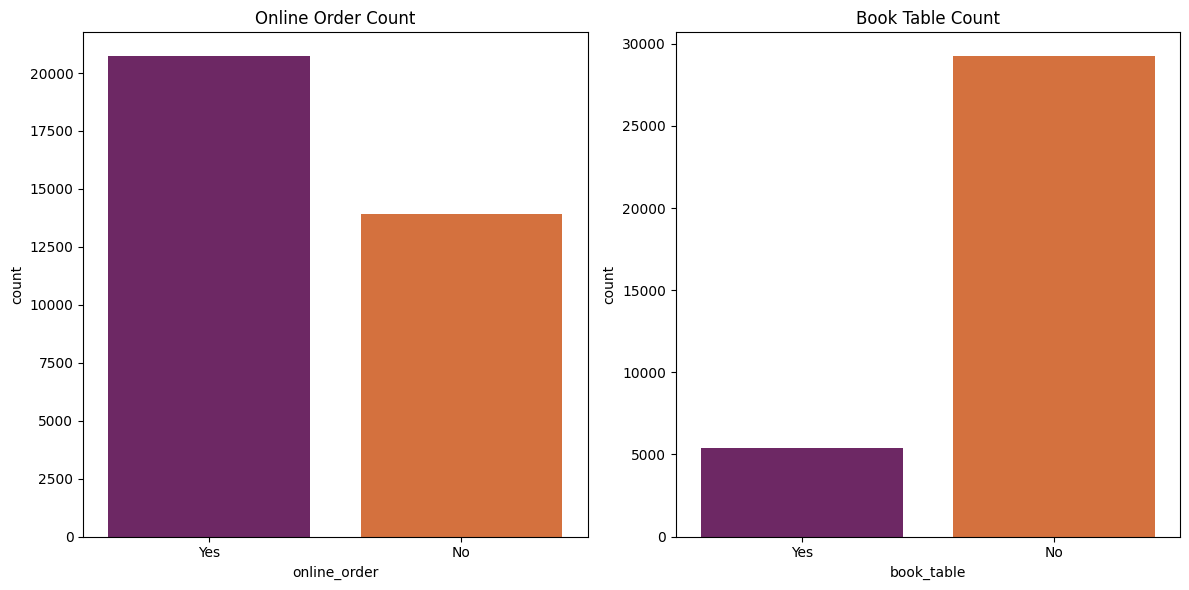

In [26]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(data=df, x='online_order', hue='online_order', palette='inferno', ax=axes[0])
axes[0].set_title('Online Order Count')

sns.countplot(data=df, x='book_table', hue='book_table', palette='inferno', ax=axes[1])
axes[1].set_title('Book Table Count')
plt.tight_layout()
plt.show()


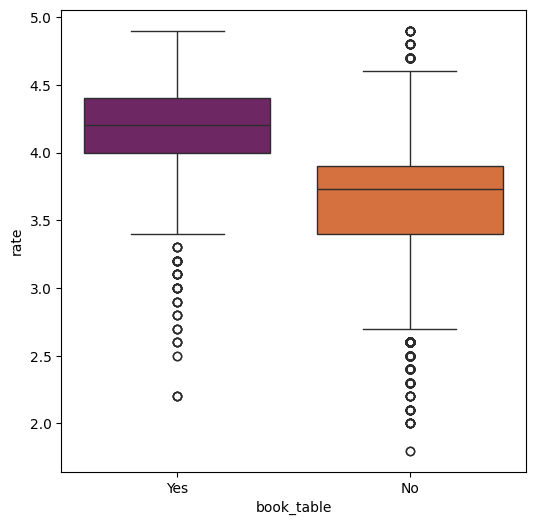

In [27]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='book_table', y='rate', hue='book_table',palette='inferno');

In [28]:
df1=df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')

In [29]:
df1=pd.DataFrame(df1)

In [30]:
df1=pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum);
df1.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1432\550207404.py:1: FutureWarning: The provided callable <function sum at 0x00000261BEB0A3E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1=pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum);


name      
online_order        No   Yes
location                    
BTM                802  1682
Banashankari       260   311
Banaswadi          208   219
Bannerghatta Road  399   653
Basavanagudi       182   281

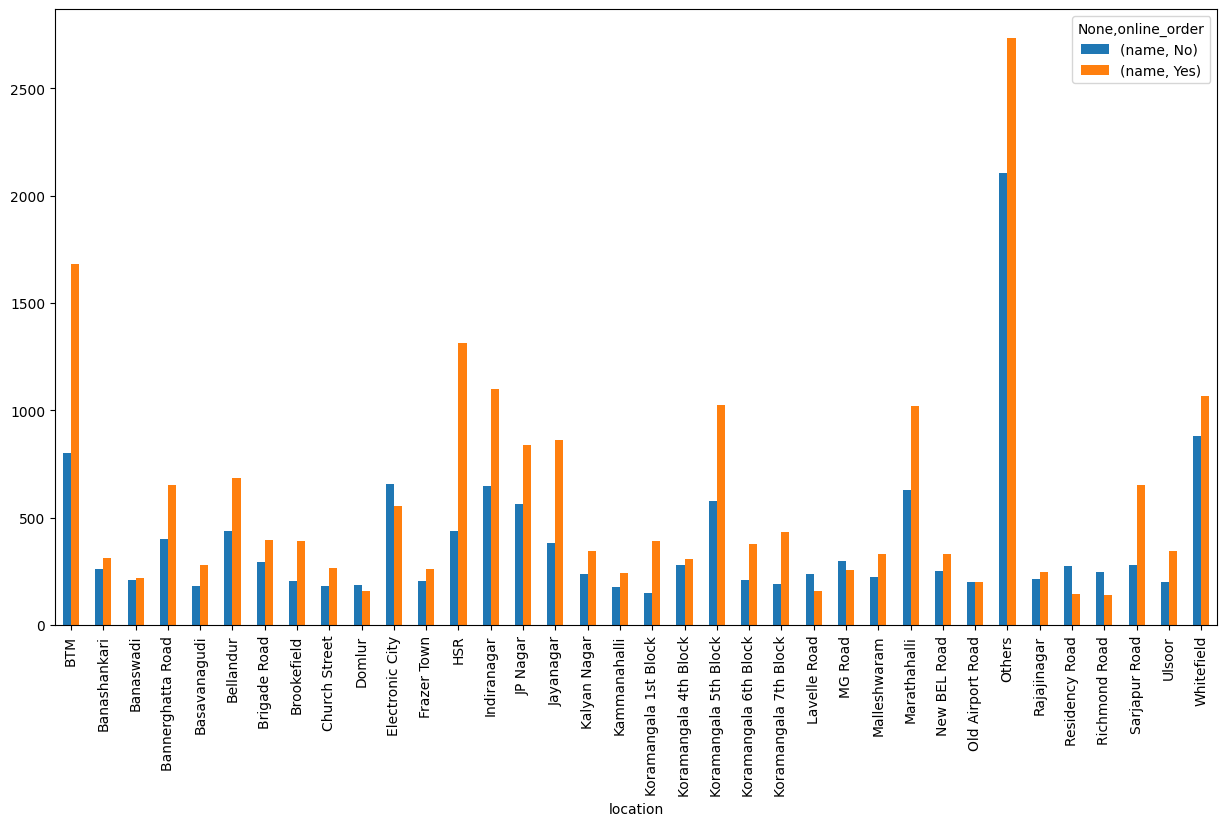

In [31]:
df1.plot(kind= 'bar',figsize=(15,8));

In [32]:
df2=df.groupby(['location','online_order'])['name'].count()
df2.to_csv('eon.csv')
df2=pd.read_csv('eon.csv')

In [33]:
df2=pd.pivot_table(df2, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df2.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1432\3003404379.py:1: FutureWarning: The provided callable <function sum at 0x00000261BEB0A3E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2=pd.pivot_table(df2, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)


name      
online_order        No   Yes
location                    
BTM                802  1682
Banashankari       260   311
Banaswadi          208   219
Bannerghatta Road  399   653
Basavanagudi       182   281

<Axes: xlabel='location'>

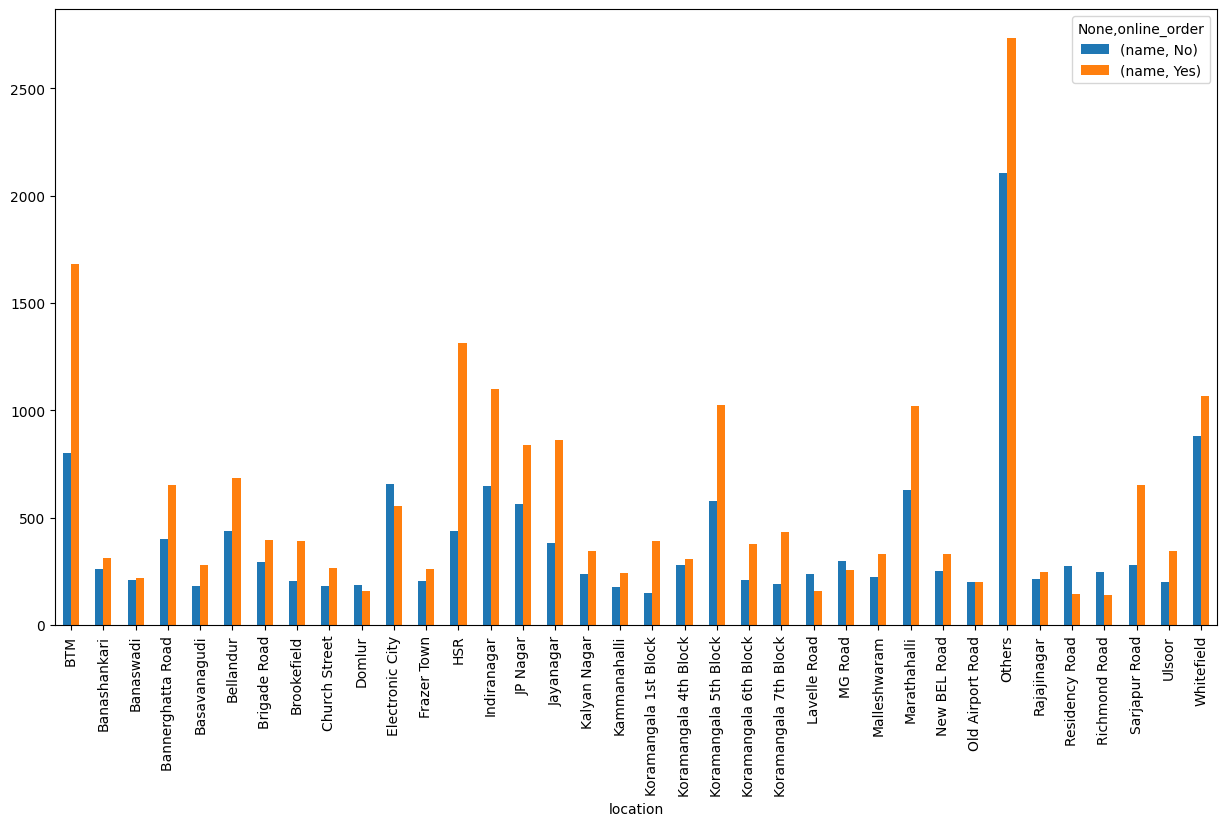

In [34]:
df2.plot(kind='bar', figsize=(15,8))

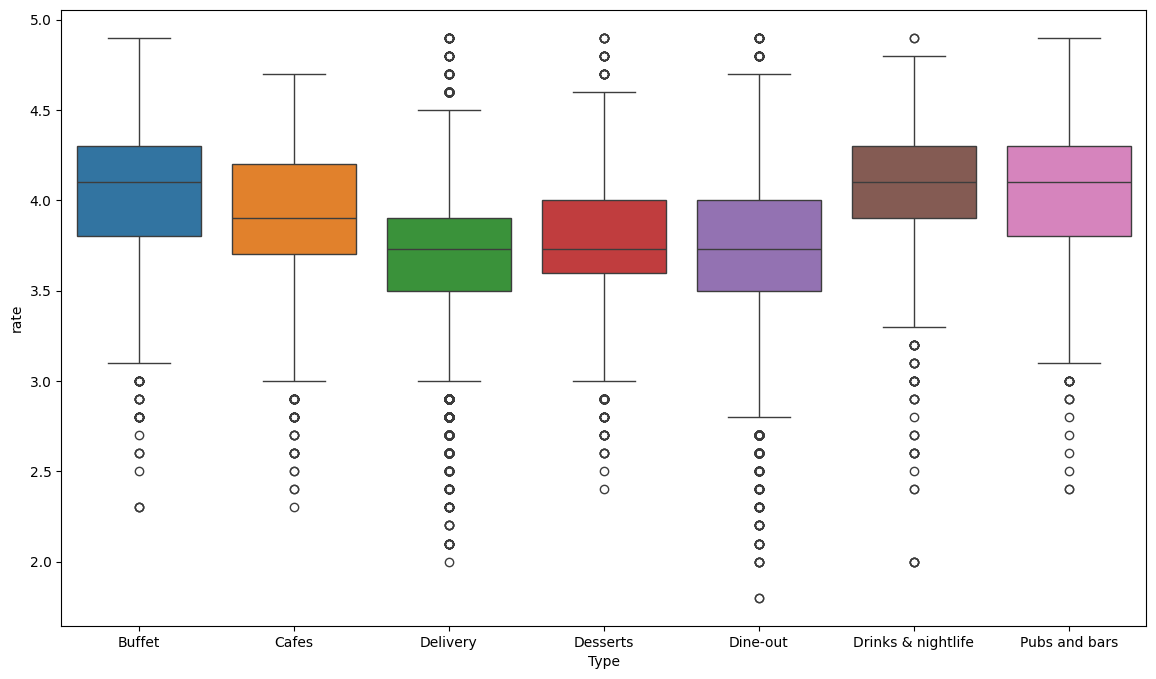

In [35]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df,x='Type', y='rate', hue='Type');

In [43]:
df3=df.groupby(['location','Type'])['name'].count()
df3.to_csv('one.csv')
df3=pd.read_csv('one.csv')
df3=pd.pivot_table(df3, values=None, index=['location'],columns=['Type'], fill_value=0, aggfunc=np.sum)
df3.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1432\403328339.py:4: FutureWarning: The provided callable <function sum at 0x00000261BEB0A3E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3=pd.pivot_table(df3, values=None, index=['location'],columns=['Type'], fill_value=0, aggfunc=np.sum)


name                                                      \
Type              Buffet Cafes Delivery Desserts Dine-out Drinks & nightlife   
location                                                                       
BTM                   15    46     1418      110      866                 15   
Banashankari           5    24      243       46      246                  7   
Banaswadi              0    13      157       19      233                  4   
Bannerghatta Road      8    27      510       92      404                  9   
Basavanagudi           4     8      195       45      208                  3   

                                 
Type              Pubs and bars  
location                         
BTM                          14  
Banashankari                  0  
Banaswadi                     1  
Bannerghatta Road             2  
Basavanagudi                  0

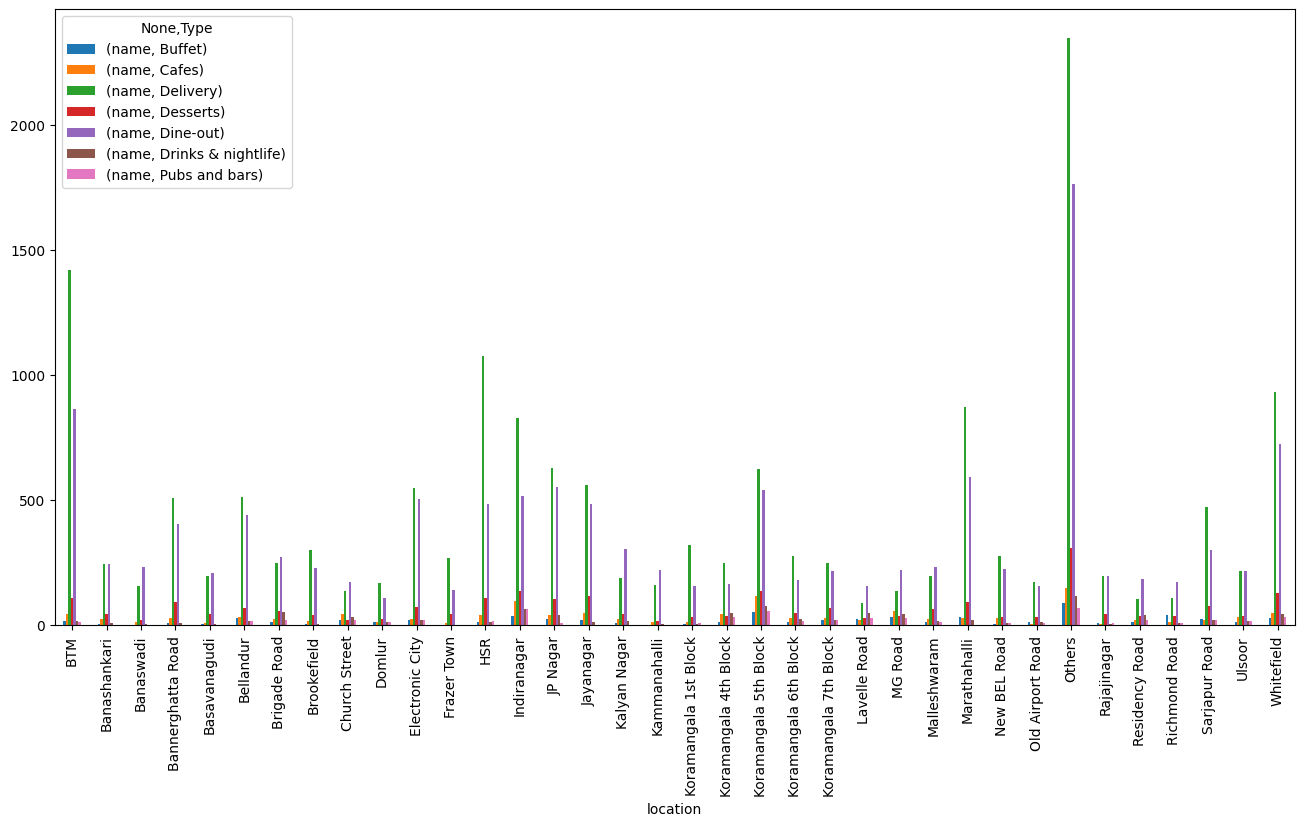

In [37]:
df3.plot(kind='bar', figsize=(16,8));

In [38]:
df4=df[['location','votes']] #Extracting 'location' and 'votes' columns
df4.drop_duplicates()
df5=df4.groupby(['location'])['votes'].sum() #Grouping by 'location' and summing up 'votes'
df5=df5.to_frame() #Converting the Series back to a DataFrame
df5=df5.sort_values('votes',ascending=False) #Sorting the DataFrame by 'votes' in descending order
df5.head()

,votes
location,
Koramangala 5th Block,1984132
Indiranagar,1129994
Others,1016001
Koramangala 4th Block,591240
Church Street,555228


[]

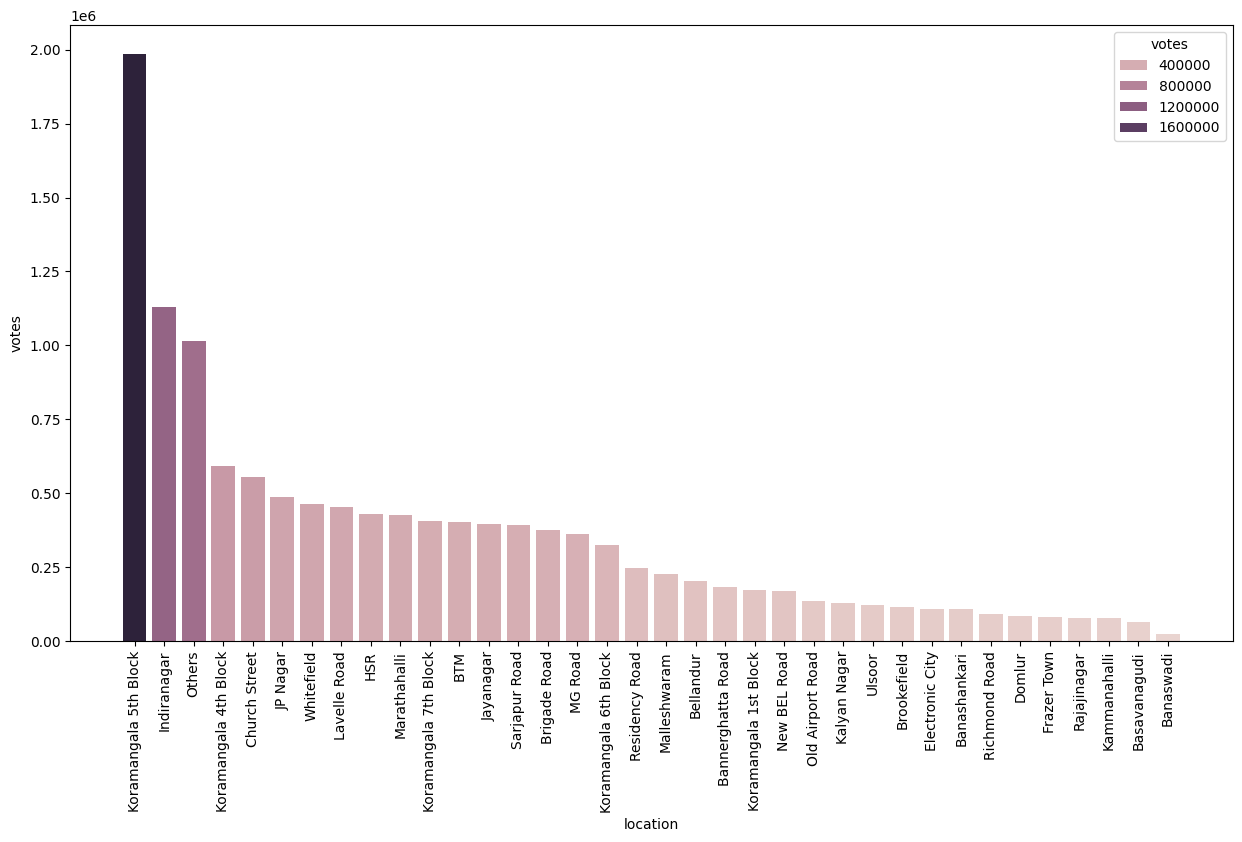

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(x=df5.index, data=df5,y='votes', hue='votes')
plt.xticks(rotation=90)
plt.plot()

In [40]:
df6 = df[['cuisines', 'votes']]  # Extracting 'cuisines' and 'votes' columns
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()  # Grouping by 'cuisines' and summing up 'votes'
df7 = df7.to_frame()  
df7 = df7.sort_values('votes', ascending=False)  # Sorting the DataFrame by 'votes' in descending order
df7.head()

,votes
cuisines,
Others,10498501
North Indian,439263
"North Indian, Chinese",187867
South Indian,130350
"North Indian, Mughlai",88971


In [41]:
df7=df7.iloc[1:] # we deselect the cuisines  in others 
df7.head() 

,votes
cuisines,
North Indian,439263
"North Indian, Chinese",187867
South Indian,130350
"North Indian, Mughlai",88971
Chinese,79450


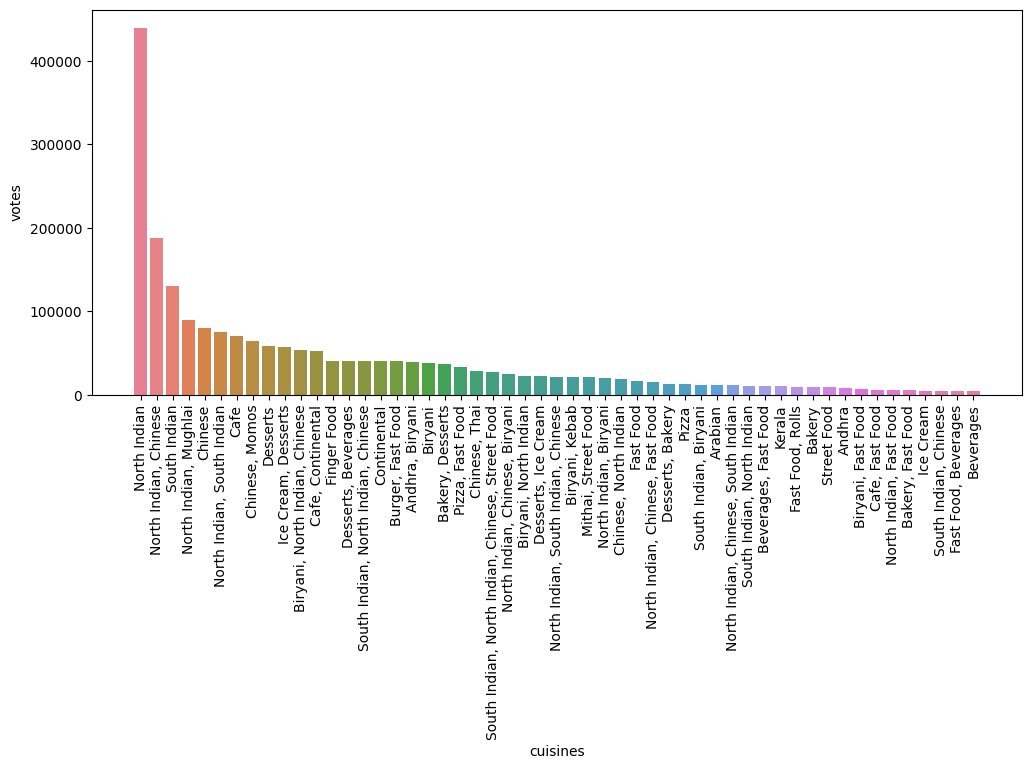

In [42]:
plt.figure(figsize=(12,5))
sns.barplot(df7, y='votes',x=df7.index, hue='cuisines')
plt.xticks(rotation=90)
plt.plot();